In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
import tensorflow as tf

### 1. 讀入 Fashion MNSIT 數據集

In [35]:
from tensorflow.keras.datasets import fashion_mnist

In [36]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 查看數據集內容

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [38]:
n = 729

這是 Sneaker


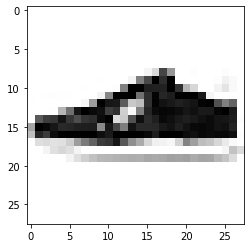

In [39]:
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

In [40]:
len(x_train)

60000

In [41]:
len(x_test)

10000

In [42]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [43]:
y_train[n]

7

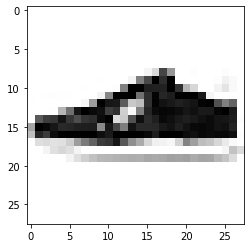

In [44]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

In [45]:
x_train.shape

(60000, 28, 28)

##### 因為一個 channel (只有灰階)，所以 (28, 28) ->(28, 28, 1)

In [46]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255

In [47]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [48]:
x_train[729].shape

(28, 28, 1)

In [49]:
y_train[729] 

7

In [50]:
from tensorflow.keras.utils import to_categorical

In [51]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 讀入需要的函式

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

### Step 1. 打造函數學習機 (CNN)

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


##### 輸出 16 個 28x28 矩陣
##### 事實上是 (28, 28, 16)

In [55]:
model.add(MaxPooling2D(pool_size=(2,2)))

##### (14,14,16)

In [56]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

##### output (14, 14, 32)

In [58]:
model.add(MaxPooling2D(pool_size=(2,2)))

##### output (7, 7, 32)

In [59]:
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [60]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [61]:
model.add(Flatten())

In [62]:
model.add(Dense(54, activation='relu'))

In [63]:
model.add(Dense(10, activation='softmax'))

### 看一下神經網路

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

##### 3*3(權重) + 1(bias)

In [65]:
(3*3+1)*16

160

In [66]:
(3*3*16+1)*32

4640

In [67]:
model.compile(loss='mse', optimizer=SGD(lr=0.087),
             metrics=['accuracy'])

### Step 2. Fit

In [68]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0894 - acc: 0.2112
Epoch 2/12
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0854 - acc: 0.3530 - l
Epoch 3/12
60000/60000 [==============================] - 15s 247us/sample - loss: 0.0594 - acc: 0.5795
Epoch 4/12
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0408 - acc: 0.7041
Epoch 5/12
60000/60000 [==============================] - 15s 251us/sample - loss: 0.0360 - acc: 0.7413
Epoch 6/12
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0331 - acc: 0.7665
Epoch 7/12
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0315 - acc: 0.7801
Epoch 8/12
60000/60000 [==============================] - 15s 247us/sample - loss: 0.0298 - acc: 0.7931
Epoch 9/12
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0287 - acc: 0.7992
Epoch 10/12
60000/60000 [==============================] - 1

### Step 3. 預測

In [69]:
result = model.predict_classes(x_test)

In [76]:
def my_predict(n):
    print('我的 CNN 預測是', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

我的 CNN 預測是 Sandal


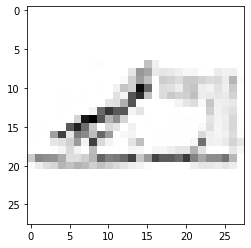

In [77]:
my_predict(729)

In [79]:
from ipywidgets import interact_manual

In [80]:
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [81]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 104us/sample - loss: 0.0263 - acc: 0.8172


In [82]:
loss, acc = score

In [83]:
print('測試資料正確率為', acc)

測試資料正確率為 0.8172
